<h4>Libraries</<h4>

In [1]:
import numpy as np
import pandas as pd
import scipy
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

<h4>Import data</h4>

In [2]:
ticket = yf.Ticker('EURUSD=X')
dataset = ticket.history(period='max', interval='1d', auto_adjust=True).drop(columns=['Volume', 'Dividends', 'Stock Splits']).rename(columns={'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close'}).round(5)
dataset['date'] = dataset.index
dataset.reset_index(drop=True, inplace=True)
dataset

,open,high,low,close,date
0,1.20340,1.20401,1.19440,1.19650,2003-12-01
1,1.19610,1.21090,1.19460,1.20890,2003-12-02
2,1.20900,1.21300,1.20770,1.21230,2003-12-03
3,1.21200,1.21440,1.20440,1.20809,2003-12-04
4,1.20780,1.21910,1.20659,1.21869,2003-12-05
...,...,...,...,...,...
4762,1.08780,1.09039,1.08519,1.08780,2022-04-12
4763,1.08261,1.08738,1.08103,1.08261,2022-04-13
4764,1.08966,1.09226,1.07586,1.08966,2022-04-14
4765,1.08210,1.08234,1.07988,1.08210,2022-04-15


<h4>Feature Engineering</h4>

In [3]:

dataset['date'] = pd.to_datetime(dataset['date'])
dataset['day'] = dataset['date'].dt.day
dataset['day_of_year'] = dataset['date'].dt.dayofyear 
dataset['weekday'] = dataset['date'].apply(lambda x: x.weekday()) # Monday = 0 / Friday = 4	
dataset['month'] = dataset['date'].dt.month
dataset['mean_close'] = np.mean(dataset['close'])
dataset['median_close'] = np.median(dataset['close'])
dataset

,open,high,low,close,date,day,day_of_year,weekday,month,mean_close,median_close
0,1.20340,1.20401,1.19440,1.19650,2003-12-01,1,335,0,12,1.253278,1.24167
1,1.19610,1.21090,1.19460,1.20890,2003-12-02,2,336,1,12,1.253278,1.24167
2,1.20900,1.21300,1.20770,1.21230,2003-12-03,3,337,2,12,1.253278,1.24167
3,1.21200,1.21440,1.20440,1.20809,2003-12-04,4,338,3,12,1.253278,1.24167
4,1.20780,1.21910,1.20659,1.21869,2003-12-05,5,339,4,12,1.253278,1.24167
...,...,...,...,...,...,...,...,...,...,...,...
4762,1.08780,1.09039,1.08519,1.08780,2022-04-12,12,102,1,4,1.253278,1.24167
4763,1.08261,1.08738,1.08103,1.08261,2022-04-13,13,103,2,4,1.253278,1.24167
4764,1.08966,1.09226,1.07586,1.08966,2022-04-14,14,104,3,4,1.253278,1.24167
4765,1.08210,1.08234,1.07988,1.08210,2022-04-15,15,105,4,4,1.253278,1.24167


<h4>Explore the data</h4>

In [4]:
print(dataset.describe(), '\n')
print(dataset.info(), '\n')
print(dataset.dtypes, '\n')

              open         high          low        close          day  \
count  4767.000000  4767.000000  4767.000000  4767.000000  4767.000000   
mean      1.253252     1.257931     1.248122     1.253278    15.724565   
std       0.119373     0.120137     0.119910     0.119363     8.803794   
min       1.039390     1.041990     0.072900     1.039050     1.000000   
25%       1.145470     1.148370     1.140330     1.145505     8.000000   
50%       1.241620     1.247010     1.236840     1.241670    16.000000   
75%       1.338035     1.342900     1.333000     1.338160    23.000000   
max       1.598180     1.602820     1.587400     1.598800    31.000000   

       day_of_year      weekday        month   mean_close  median_close  
count  4767.000000  4767.000000  4767.000000  4767.000000    4767.00000  
mean    181.616950     2.001468     6.472834     1.253278       1.24167  
std     106.463303     1.415029     3.481750     0.000000       0.00000  
min       1.000000     0.000000     1

<h4>Correlation Estimate</h4>

In [5]:
dataset.corr()

,open,high,low,close,day,day_of_year,weekday,month,mean_close,median_close
open,1.000000,0.999243,0.980624,0.999076,0.005731,0.011430,0.002830,0.011194,NaN,NaN
high,0.999243,1.000000,0.980129,0.999238,0.006357,0.011575,0.004611,0.011275,NaN,NaN
low,0.980624,0.980129,1.000000,0.980636,0.005989,0.017699,0.002828,0.017483,NaN,NaN
close,0.999076,0.999238,0.980636,1.000000,0.006601,0.012367,0.003345,0.012065,NaN,NaN
day,0.005731,0.006357,0.005989,0.006601,1.000000,0.095486,-0.002696,0.013011,NaN,NaN
day_of_year,0.011430,0.011575,0.017699,0.012367,0.095486,1.000000,0.000782,0.996564,NaN,NaN
weekday,0.002830,0.004611,0.002828,0.003345,-0.002696,0.000782,1.000000,0.001009,NaN,NaN
month,0.011194,0.011275,0.017483,0.012065,0.013011,0.996564,0.001009,1.000000,NaN,NaN
mean_close,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
median_close,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h4>Visualize the Raw data</h4>

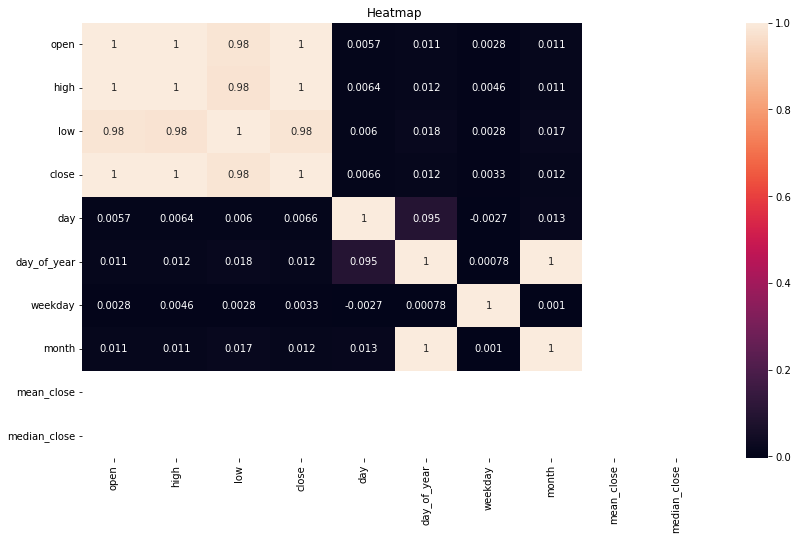

In [6]:
plt.figure(figsize=(14, 8))
sns.heatmap(dataset.corr(), annot=True)
plt.title('Heatmap')
plt.show()

<h4>Create filter</h4>

In [7]:
dataset_MA = dataset.copy()
dataset_MA['MA'] = dataset_MA['close'].rolling(window=21).mean()
dataset_MA.loc[dataset['open'] > dataset_MA['MA']]
print(dataset_MA.iloc[:-1, :])

         open     high      low    close       date  day  day_of_year  \
0     1.20340  1.20401  1.19440  1.19650 2003-12-01    1          335   
1     1.19610  1.21090  1.19460  1.20890 2003-12-02    2          336   
2     1.20900  1.21300  1.20770  1.21230 2003-12-03    3          337   
3     1.21200  1.21440  1.20440  1.20809 2003-12-04    4          338   
4     1.20780  1.21910  1.20659  1.21869 2003-12-05    5          339   
...       ...      ...      ...      ...        ...  ...          ...   
4761  1.08849  1.09328  1.08746  1.08849 2022-04-11   11          101   
4762  1.08780  1.09039  1.08519  1.08780 2022-04-12   12          102   
4763  1.08261  1.08738  1.08103  1.08261 2022-04-13   13          103   
4764  1.08966  1.09226  1.07586  1.08966 2022-04-14   14          104   
4765  1.08210  1.08234  1.07988  1.08210 2022-04-15   15          105   

      weekday  month  mean_close  median_close        MA  
0           0     12    1.253278       1.24167       NaN  
1    

<h4>Group By</h4>

In [8]:
print(dataset.groupby('close').mean())

            open     high      low   day  day_of_year  weekday  month  \
close                                                                   
1.03905  1.03939  1.04515  1.03853  21.0        356.0      2.0   12.0   
1.04058  1.04047  1.04199  1.03552  20.0        355.0      1.0   12.0   
1.04170  1.04178  1.04910  1.04178  29.0        364.0      3.0   12.0   
1.04188  1.04178  1.04723  1.04037  16.0        351.0      4.0   12.0   
1.04199  1.04184  1.04789  1.03913   4.0          4.0      2.0    1.0   
...          ...      ...      ...   ...          ...      ...    ...   
1.59119  1.58040  1.59431  1.57988  21.0        112.0      0.0    4.0   
1.59139  1.58341  1.59309  1.58321  21.0        203.0      0.0    7.0   
1.59490  1.57871  1.59490  1.57679  11.0        193.0      4.0    7.0   
1.59581  1.57841  1.59760  1.57801  16.0        107.0      2.0    4.0   
1.59880  1.59114  1.60131  1.58431  22.0        113.0      1.0    4.0   

         mean_close  median_close  
close         

<h4>Outliers</h4>

No handles with labels found to put in legend.


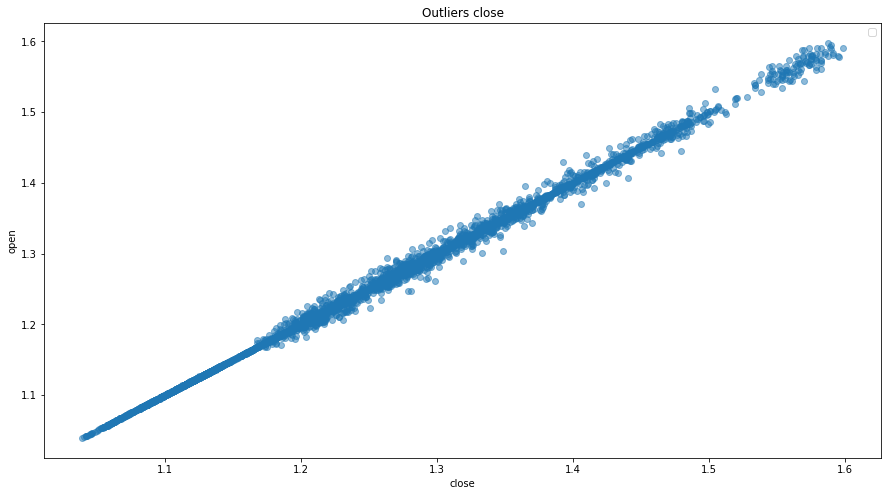

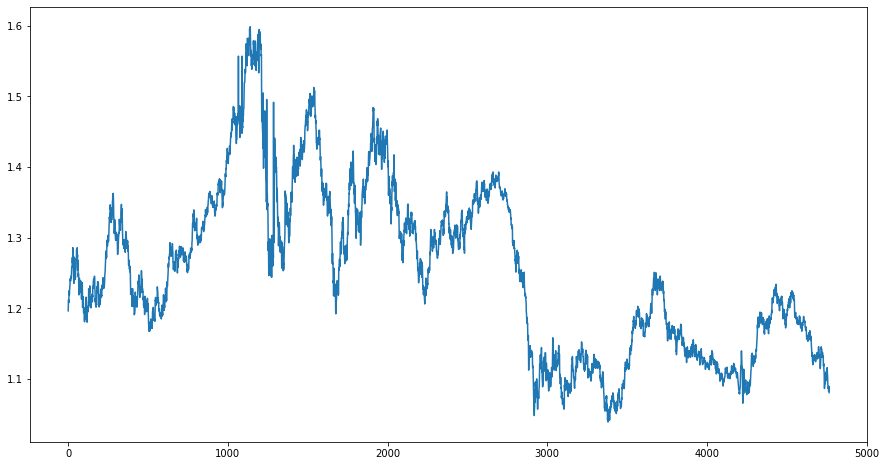

In [9]:
x = dataset['close']
y = dataset['open']
plt.figure(figsize=(15, 8))
plt.scatter(x, y, alpha=0.5)
plt.xlabel("close")
plt.ylabel("open")
plt.legend()
plt.title('Outliers close')
plt.show()

plt.figure(figsize=(15, 8))
plt.plot(x)
plt.show()



<h4>Histogram Plot</h4>

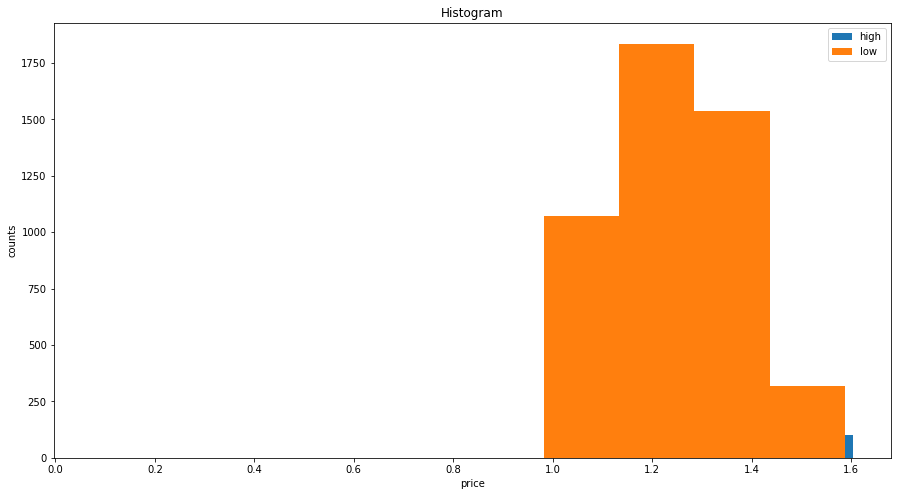

In [10]:
plt.figure(figsize=(15, 8))
plt.hist(dataset['high'], label='high')
plt.hist(dataset['low'], label='low')
plt.xlabel("price")
plt.ylabel("counts")
plt.legend()
plt.title('Histogram')
plt.show()
